In [1]:
import numpy as np
import cv2
import glob
import pickle
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
#from functions import *
#from functions import single_img_features
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

In [2]:
cars = []
notcars =[]

# cars
images = glob.glob('vehicles/**/*.png', recursive=True) # cars
for image in images:
    #cars_train.append(image)
    cars.append(image)

# non-cars
images = glob.glob('non-vehicles/**/*.png', recursive=True) # noncars
for image in images:
    #notcars_train.append(image)
    notcars.append(image)
    
    
no_of_images = [len(cars), len(notcars)]
no_of_images

[8792, 8968]

In [3]:
# def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
#                         hist_bins=32, orient=9, 
#                         pix_per_cell=8, cell_per_block=2, hog_channel=0,
#                         spatial_feat=True, hist_feat=True, hog_feat=True):    
#     #1) Define an empty list to receive features
#     img_features = []
#     #2) Apply color conversion if other than 'RGB'
#     if color_space != 'RGB':
#         if color_space == 'HSV':
#             feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#         elif color_space == 'LUV':
#             feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
#         elif color_space == 'HLS':
#             feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
#         elif color_space == 'YUV':
#             feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
#         elif color_space == 'YCrCb':
#             feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
#     else: feature_image = np.copy(img)      
#     #3) Compute spatial features if flag is set
#     if spatial_feat == True:
#         spatial_features = bin_spatial(feature_image, size=spatial_size)
#         #4) Append features to list
#         img_features.append(spatial_features)
#     #5) Compute histogram features if flag is set
#     if hist_feat == True:
#         hist_features = color_hist(feature_image, nbins=hist_bins)
#         #6) Append features to list
#         img_features.append(hist_features)
#     #7) Compute HOG features if flag is set
#     if hog_feat == True:
#         if hog_channel == 'ALL':
#             hog_features = []
#             for channel in range(feature_image.shape[2]):
#                 hog_features.extend(get_hog_features(feature_image[:,:,channel], 
#                                     orient, pix_per_cell, cell_per_block, 
#                                     vis=False, feature_vec=True))      
#         else:
#             hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
#                         pix_per_cell, cell_per_block, vis=False, feature_vec=True)
#         #8) Append features to list
#         img_features.append(hog_features)

#     #9) Return concatenated array of features
#     return np.concatenate(img_features)

    
# def search_windows(img, windows, clf, scaler, color_space='RGB', 
#                    spatial_size=(32, 32), hist_bins=32, 
#                    hist_range=(0, 256), orient=9, 
#                    pix_per_cell=8, cell_per_block=2, 
#                    hog_channel=0, spatial_feat=True, 
#                    hist_feat=True, hog_feat=True):
#     '''
#     The function returns the list of windows to be searched
#     '''
#     #1) Create an empty list to receive positive detection windows
#     on_windows = []
#     #2) Iterate over all windows in the list
#     for window in windows:
#         #3) Extract the test window from original image
#         test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
#         #4) Extract features for that window using single_img_features()
#         features = single_img_features(test_img, color_space=color_space, 
#                                        spatial_size=spatial_size, hist_bins=hist_bins, 
#                                        orient=orient, pix_per_cell=pix_per_cell, 
#                                        cell_per_block=cell_per_block, 
#                                        hog_channel=hog_channel, spatial_feat=spatial_feat,
#                                        hist_feat=hist_feat, hog_feat=hog_feat)
#         #5) Scale extracted features to be fed to classifier
#         test_features = scaler.transform(np.array(features).reshape(1, -1))
#         #6) Predict using your classifier
#         prediction = clf.predict(test_features)
#         #7) If positive (prediction == 1) then save the window
#         if prediction == 1:
#             on_windows.append(window)
#     #8) Return windows for positive detections
#     return on_windows

# # Function for plotting multiple images
# def visualise(fig, rows, cols, imgs, titles):
#     for i, img in enumerate(imgs):
#         plt.subplot(rows, cols, i+1)
#         plt.title(i+1)
#         img_dims = len(img.shape)
#         if img_dims < 3:
#             plt.imshow(img, cmap='hot')
#             plt.title(titles[i])
#         else:
#             plt.imshow(img)
#             plt.title(titles[i])

    
# def search_windows(img, windows, clf, scaler, color_space='RGB', 
#                    spatial_size=(32, 32), hist_bins=32, 
#                    hist_range=(0, 256), orient=9, 
#                    pix_per_cell=8, cell_per_block=2, 
#                    hog_channel=0, spatial_feat=True, 
#                    hist_feat=True, hog_feat=True):
#     '''
#     The function returns the list of windows to be searched
#     '''
#     #1) Create an empty list to receive positive detection windows
#     on_windows = []
#     #2) Iterate over all windows in the list
#     for window in windows:
#         #3) Extract the test window from original image
#         test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
#         #4) Extract features for that window using single_img_features()
#         features = single_img_features(test_img, color_space=color_space, 
#                                        spatial_size=spatial_size, hist_bins=hist_bins, 
#                                        orient=orient, pix_per_cell=pix_per_cell, 
#                                        cell_per_block=cell_per_block, 
#                                        hog_channel=hog_channel, spatial_feat=spatial_feat,
#                                        hist_feat=hist_feat, hog_feat=hog_feat)
#         #5) Scale extracted features to be fed to classifier
#         test_features = scaler.transform(np.array(features).reshape(1, -1))
#         #6) Predict using your classifier
#         prediction = clf.predict(test_features)
#         #7) If positive (prediction == 1) then save the window
#         if prediction == 1:
#             on_windows.append(window)
#     #8) Return windows for positive detections
#     return on_windows

# # Function for plotting multiple images
# def visualise(fig, rows, cols, imgs, titles):
#     for i, img in enumerate(imgs):
#         plt.subplot(rows, cols, i+1)
#         plt.title(i+1)
#         img_dims = len(img.shape)
#         if img_dims < 3:
#             plt.imshow(img, cmap='hot')
#             plt.title(titles[i])
#         else:
#             plt.imshow(img)
#             plt.title(titles[i])


In [4]:
# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thickness=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thickness)
    # Return the image copy with boxes drawn
    return imcopy

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to compute binned color features
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    # Return the feature vector
    return np.hstack((color1, color2, color3))

# Define a function to compute color histogram features
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9,
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else:
            feature_image = np.copy(image)

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel],
                                        orient, pix_per_cell, cell_per_block,
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient,
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

# Define a function that takes an image,
# start and stop positions in both x and y,
# window size (x and y dimensions),
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None],
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_windows = np.int(xspan/nx_pix_per_step) - 1
    ny_windows = np.int(yspan/ny_pix_per_step) - 1
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]

            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

# Define a function you will pass an image
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB',
                    spatial_size=(32, 32), hist_bins=32,
                    hist_range=(0, 256), orient=9,
                    pix_per_cell=8, cell_per_block=2,
                    hog_channel=0, spatial_feat=True,
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space,
                            spatial_size=spatial_size, hist_bins=hist_bins,
                            orient=orient, pix_per_cell=pix_per_cell,
                            cell_per_block=cell_per_block,
                            hog_channel=hog_channel, spatial_feat=spatial_feat,
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9,
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True, vis=False):
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else:
        feature_image = np.copy(img)
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel],
                                    orient, pix_per_cell, cell_per_block,
                                    vis=False, feature_vec=True))
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient,
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap

def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels, color=(0, 255, 0), thickness=5):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], color, thickness)
    # Return the image
    return img


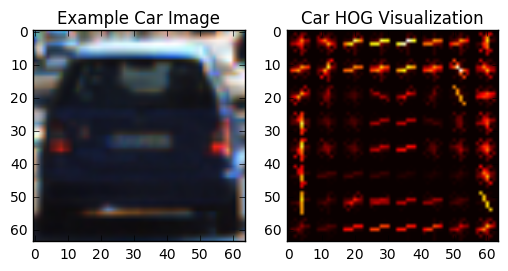

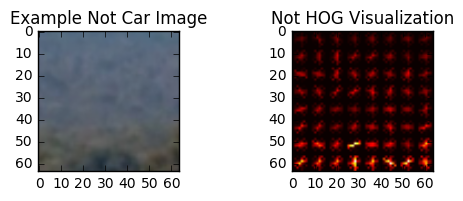

In [5]:
orient = 9 # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
# Choose random car/not-car indices
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))

# Read in car/not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])

# car = mpimg.imread(cars[4])
# notcar = mpimg.imread(notcars[4])
gray_car = cv2.cvtColor(car_image, cv2.COLOR_RGB2GRAY)
gray_notcar = cv2.cvtColor(notcar_image, cv2.COLOR_RGB2GRAY)

car_feature, car_hog = get_hog_features(gray_car, orient, pix_per_cell, cell_per_block,
                        vis=True, feature_vec=True)
notcar_feature, notcar_hog = get_hog_features(gray_notcar, orient, pix_per_cell, cell_per_block,
                        vis=True, feature_vec=True)
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(car_hog, cmap='hot')
plt.title('Car HOG Visualization')
plt.show()
plt.subplot(221)
plt.imshow(notcar_image)
plt.title('Example Not Car Image')
plt.subplot(222)
plt.imshow(notcar_hog, cmap='hot')
plt.title('Not HOG Visualization')
plt.show()

In [ ]:
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
#y_start_stop = [None, None] # Min and max in y to search in slide_window()
t = time.time()
n_samples = 1000
random_idxs = np.random.randint(0, len(cars), n_samples)
test_cars = cars #np.array(cars)[random_idxs]
test_notcars = notcars #np.array(notcars)[random_idxs]



car_features = extract_features(test_cars, color_space=color_space,
                        spatial_size=spatial_size, hist_bins=hist_bins,
                        orient=orient, pix_per_cell=pix_per_cell,
                        cell_per_block=cell_per_block,
                        hog_channel=hog_channel, spatial_feat=spatial_feat,
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(test_notcars, color_space=color_space,
                        spatial_size=spatial_size, hist_bins=hist_bins,
                        orient=orient, pix_per_cell=pix_per_cell,
                        cell_per_block=cell_per_block,
                        hog_channel=hog_channel, spatial_feat=spatial_feat,
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

svc, X_scaler

In [6]:
svc = pickle.load(open("svc.pkl", "rb") )
X_scaler = pickle.load(open("xscaler.pkl", "rb"))

print(svc)
print(X_scaler)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
StandardScaler(copy=True, with_mean=True, with_std=True)


In [7]:
%matplotlib inline
def visualise(fig, rows, cols, imgs, titles):
    for i, img in enumerate(imgs):
        plt.subplot(rows, cols, i+1)
        plt.title(i+1)
        img_dims = len(img.shape)
        if img_dims < 3:
            plt.imshow(img, cmap='hot')
            plt.title(titles[i])
        else:
            plt.imshow(img)
            plt.title(titles[i])

In [8]:
#pickle.dump(svc, open("svc.pkl", "wb"))
#pickle.dump(X_scaler, open("xscaler.pkl", "wb"))

svc = pickle.load(open("svc.pkl", "rb") )
X_scaler = pickle.load(open("xscaler.pkl", "rb"))
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
#y_start_stop = [None, None] # Min and max in y to search in slide_window()

0.0 1.0
4.12437629699707 seconds to process one image searching 542 windows
0.0 1.0
3.560960531234741 seconds to process one image searching 542 windows
0.0 1.0
3.6609692573547363 seconds to process one image searching 542 windows
0.0 1.0
3.5830492973327637 seconds to process one image searching 542 windows
0.0 1.0
3.6593027114868164 seconds to process one image searching 542 windows
0.0 1.0
3.6120798587799072 seconds to process one image searching 542 windows


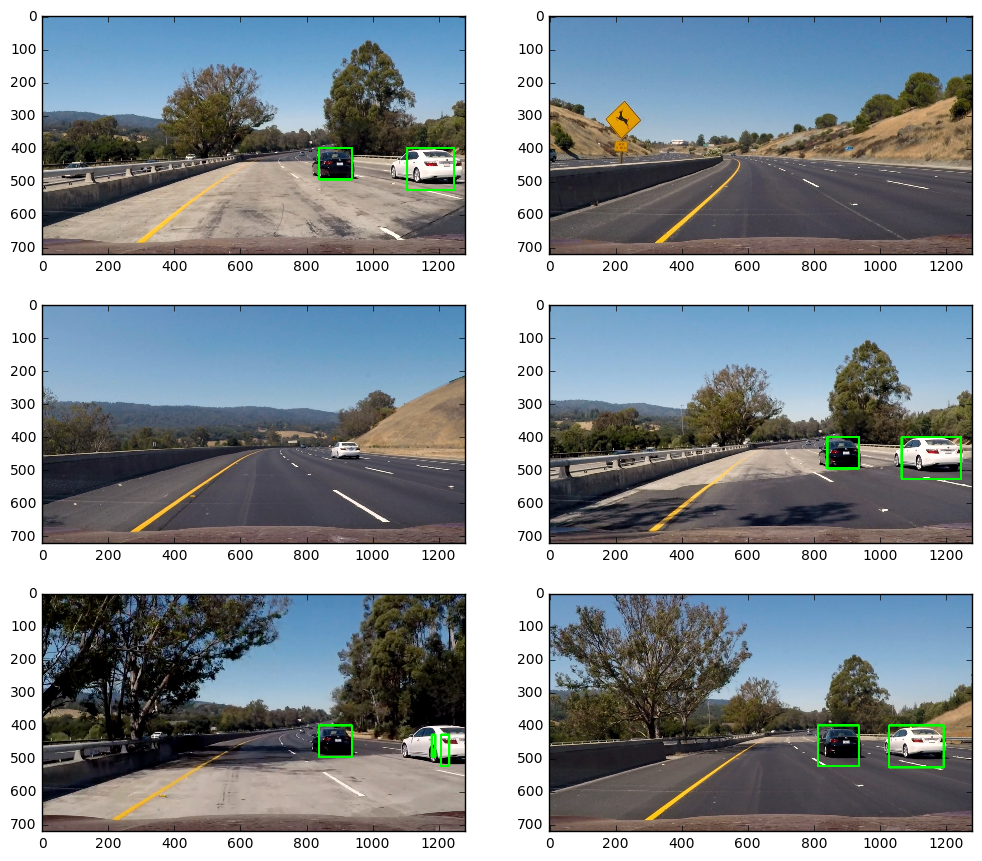

In [21]:
from scipy.ndimage.measurements import label
path = 'test_images/*'
example_images = glob.glob(path)
images = []
titles = []
y_start_stop = [400, 656]
overlap = 0.70

for example_img in example_images:
    t1 = time.time()
    img = mpimg.imread(example_img)
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    print(np.min(img), np.max(img))
    
#     windows_48 = slide_window(img, x_start_stop=[None, None], y_start_stop=y_start_stop,
#                     xy_window=(48, 48), xy_overlap=(overlap, overlap))
    windows_64 = slide_window(img, x_start_stop=[None, None], y_start_stop=y_start_stop,
                    xy_window=(96, 96), xy_overlap=(overlap, overlap))
    windows_128 = slide_window(img, x_start_stop=[None, None], y_start_stop=y_start_stop,
                    xy_window=(128, 128), xy_overlap=(overlap, overlap))
    windows_256 = slide_window(img, x_start_stop=[None, None], y_start_stop=y_start_stop,
                    xy_window=(256, 256), xy_overlap=(overlap, overlap))
    
    windows = windows_64 + windows_128 + windows_256
    
    hot_windows = search_windows(img, windows, svc, X_scaler, color_space=color_space,
                    spatial_size=spatial_size, hist_bins=hist_bins,
                    hist_range=(0, 256), orient=orient,
                    pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                    hog_channel=hog_channel, spatial_feat=spatial_feat,
                    hist_feat=hist_feat, hog_feat=hog_feat)
    heatmap = np.zeros_like(draw_img[:,:,0]) #.astype(np.float)
    heatmap = add_heat(heatmap, hot_windows)
    heatmap = apply_threshold(heatmap, 2)
    heatmap = np.clip(heatmap, 0, 255)
    labels = label(heatmap)
    window_img = draw_labeled_bboxes(draw_img, labels, color=(0, 255, 0), thickness=5)
    images.append(window_img)
    titles.append('')
    print(time.time()-t1, 'seconds to process one image searching', len(windows), 'windows')
fig = plt.figure(figsize=(12,18), dpi=300)
visualise(fig, 5, 2, images, titles)

In [15]:
# def find_cars(img, scale):
#     draw_img = np.copy(img)
#     # heatmap of zeros
#     heatmap = np.zeros_like(img[:,:,0])
#     img = img.astype(np.float32)/255
    
#     img_tosearch = img[y_start:y_stop,:,:]
#     ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
#     if scale != 1:
#         imshape = ctrans_tosearch.shape
#         ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int()))

def process_img(img):
    t1 = time.time()
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    print(np.min(img), np.max(img))
    
    windows_48 = slide_window(img, x_start_stop=[None, None], y_start_stop=y_start_stop,
                    xy_window=(48, 48), xy_overlap=(overlap, overlap))
    windows_64 = slide_window(img, x_start_stop=[None, None], y_start_stop=y_start_stop,
                    xy_window=(96, 96), xy_overlap=(overlap, overlap))
    windows_128 = slide_window(img, x_start_stop=[None, None], y_start_stop=y_start_stop,
                    xy_window=(128, 128), xy_overlap=(overlap, overlap))
    windows_256 = slide_window(img, x_start_stop=[None, None], y_start_stop=y_start_stop,
                    xy_window=(256, 256), xy_overlap=(overlap, overlap))
    
    windows = windows_48 + windows_64 + windows_128 + windows_256
    
    hot_windows = search_windows(img, windows, svc, X_scaler, color_space=color_space,
                    spatial_size=spatial_size, hist_bins=hist_bins,
                    hist_range=(0, 256), orient=orient,
                    pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                    hog_channel=hog_channel, spatial_feat=spatial_feat,
                    hist_feat=hist_feat, hog_feat=hog_feat)
    heatmap = np.zeros_like(draw_img[:,:,0]).astype(np.float)
    heatmap = add_heat(heatmap, hot_windows)
    heatmap = apply_threshold(heatmap, 2)
    heatmap = np.clip(heatmap, 0, 255)
    labels = label(heatmap)
    window_img = draw_labeled_bboxes(draw_img, labels, color=(0, 255, 0), thickness=6)
    #print(time.time()-t1, 'seconds to process one image searching', len(windows), 'windows')
    
    return window_img
    

In [16]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [17]:
test_output = 'prject_video_output_1.mp4'
clip1 = VideoFileClip("test_video.mp4")
white_clip = clip1.fl_image(process_img) #NOTE: this function expects color images!!
%time white_clip.write_videofile(test_output, audio=False)

0.0 1.0
[MoviePy] >>>> Building video prject_video_output_1.mp4
[MoviePy] Writing video prject_video_output_1.mp4


  0%|                                                   | 0/39 [00:00<?, ?it/s]

0.0 1.0


  3%|█                                          | 1/39 [00:29<18:38, 29.45s/it]

0.0 1.0


  5%|██▏                                        | 2/39 [00:58<18:08, 29.42s/it]

0.0 1.0


  8%|███▎                                       | 3/39 [01:27<17:34, 29.30s/it]

0.0 1.0


 10%|████▍                                      | 4/39 [01:57<17:13, 29.52s/it]

0.0 1.0


 13%|█████▌                                     | 5/39 [02:29<17:01, 30.03s/it]

0.0 1.0


 15%|██████▌                                    | 6/39 [03:01<16:56, 30.81s/it]

0.0 1.0


 18%|███████▋                                   | 7/39 [03:30<16:11, 30.35s/it]

0.0 1.0


 21%|████████▊                                  | 8/39 [03:58<15:18, 29.61s/it]

0.0 1.0


 23%|█████████▉                                 | 9/39 [04:27<14:35, 29.18s/it]

0.0 1.0


 26%|██████████▊                               | 10/39 [04:55<13:59, 28.94s/it]

0.0 1.0


 28%|███████████▊                              | 11/39 [05:23<13:26, 28.82s/it]

0.0 1.0


 31%|████████████▉                             | 12/39 [05:53<13:05, 29.10s/it]

0.0 1.0


 33%|██████████████                            | 13/39 [06:27<13:16, 30.63s/it]

0.0 1.0


 36%|███████████████                           | 14/39 [07:00<12:57, 31.11s/it]

0.0 1.0


 38%|████████████████▏                         | 15/39 [07:36<13:06, 32.75s/it]

0.0 1.0


 41%|█████████████████▏                        | 16/39 [08:18<13:36, 35.51s/it]

0.0 1.0


 44%|██████████████████▎                       | 17/39 [08:55<13:07, 35.82s/it]

0.0 1.0


 46%|███████████████████▍                      | 18/39 [09:33<12:48, 36.61s/it]

0.0 1.0


 49%|████████████████████▍                     | 19/39 [10:08<12:02, 36.13s/it]

0.0 1.0


 51%|█████████████████████▌                    | 20/39 [10:41<11:06, 35.06s/it]

0.0 1.0


 54%|██████████████████████▌                   | 21/39 [11:14<10:24, 34.67s/it]

0.0 1.0


 56%|███████████████████████▋                  | 22/39 [11:51<09:56, 35.08s/it]

0.0 1.0


 59%|████████████████████████▊                 | 23/39 [12:26<09:23, 35.19s/it]

0.0 1.0


 62%|█████████████████████████▊                | 24/39 [13:09<09:23, 37.56s/it]

0.0 1.0


 64%|██████████████████████████▉               | 25/39 [13:44<08:36, 36.89s/it]

0.0 1.0


 67%|████████████████████████████              | 26/39 [14:21<07:58, 36.80s/it]

0.0 1.0


 69%|█████████████████████████████             | 27/39 [14:56<07:16, 36.40s/it]

0.0 1.0


 72%|██████████████████████████████▏           | 28/39 [15:30<06:32, 35.70s/it]

0.0 1.0


 74%|███████████████████████████████▏          | 29/39 [16:08<06:01, 36.14s/it]

0.0 1.0


 77%|████████████████████████████████▎         | 30/39 [16:46<05:31, 36.85s/it]

0.0 1.0


 79%|█████████████████████████████████▍        | 31/39 [17:23<04:55, 36.93s/it]

0.0 1.0


 82%|██████████████████████████████████▍       | 32/39 [18:01<04:19, 37.06s/it]

0.0 1.0


 85%|███████████████████████████████████▌      | 33/39 [18:37<03:41, 36.86s/it]

0.0 1.0


 87%|████████████████████████████████████▌     | 34/39 [19:13<03:03, 36.71s/it]

0.0 1.0


 90%|█████████████████████████████████████▋    | 35/39 [19:47<02:22, 35.68s/it]

0.0 1.0


 92%|██████████████████████████████████████▊   | 36/39 [20:21<01:46, 35.40s/it]

0.0 1.0


 95%|███████████████████████████████████████▊  | 37/39 [21:00<01:12, 36.39s/it]

0.0 1.0


 97%|████████████████████████████████████████▉ | 38/39 [21:37<00:36, 36.65s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: prject_video_output_1.mp4 

Wall time: 21min 40s


In [18]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(test_output))

In [19]:
project_output = 'project_video_output_2.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_img) #NOTE: this function expects color images!!
%time white_clip.write_videofile(project_output, audio=False)

0.0 1.0
[MoviePy] >>>> Building video project_video_output_2.mp4
[MoviePy] Writing video project_video_output_2.mp4


  0%|                                                 | 0/1261 [00:00<?, ?it/s]

0.0 1.0


  0%|                                      | 1/1261 [00:32<11:23:59, 32.57s/it]

0.0 1.0


KeyboardInterrupt: 

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(project_output))